# FAKE NEWS DETECTOR

In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
#Read the data
df=pd.read_csv(r'C:\Users\KIIT\Desktop\news.csv')
#Get shape and head
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
print(df.shape)

(6335, 4)


In [6]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

Split the dataset to training and test set               test size = 20% of dataset.

In [7]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

 Let’s initialize a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). Stop words are the most common words in a language that are to be filtered out before processing the natural language data. And a TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

Now, fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [8]:
# Initialize a TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set

tfidf_train=tfidf_vectorizer.fit_transform(x_train)

tfidf_test=tfidf_vectorizer.transform(x_test)

 Next, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.

Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics

In [9]:
# Initialize a PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

# Predict on the test set and calculate accuracy

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)

print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.05%


Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

In [11]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
cm

array([[590,  48],
       [ 40, 589]], dtype=int64)

So with this model, we have 589 true positives, 587 true negatives, 42 false positives, and 49 false negatives.

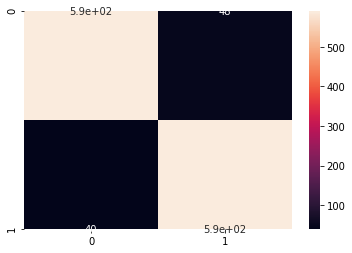

In [17]:
import seaborn as sns
ax =sns.heatmap(cm, annot = True)
ax